# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint

In [2]:
import dendrotweaks as dd

In [3]:
# morphology
dd.morphology.Node
dd.morphology.Tree
dd.morphology.SWCNode
dd.morphology.SWCTree
dd.morphology.Section
dd.morphology.Domain
dd.morphology.SectionTree
dd.morphology.Segment
dd.morphology.SegmentTree

dendrotweaks.morphology.seg_trees.SegmentTree

In [4]:
# membrane
dd.membrane.Mechanism
dd.membrane.SectionGroup
dd.membrane.SegmentGroup
dd.membrane.Distribution

dendrotweaks.membrane.distributions.Distribution

In [5]:
# stimuli
dd.stimuli.IClamp
dd.stimuli.Synapse
dd.stimuli.Population

dendrotweaks.stimuli.populations.Population

In [6]:
dd.Model
dd.NEURONSimulator

dendrotweaks.simulators.NEURONSimulator

# Create a Model

In [7]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [9]:
model = dd.Model(name='Park_2019',
                 path_to_data=path_to_data)

## Load morphology from SWC

In [10]:
model.path_manager.print_directory_tree()

├── csv
│   ├── Park_2019__stimuli.csv
│   ├── Park_2019_groups.csv
│   └── Park_2019_stimuli.csv
├── json
│   ├── Park_2019.json
│   └── Park_2019_.json
├── mod
│   ├── CaHVA
│   │   ├── CaHVA.mod
│   │   └── x86_64
│   ├── CaHVA.mod
│   ├── CaLVA
│   │   ├── CaLVA.mod
│   │   └── x86_64
│   ├── CaLVA.mod
│   ├── KCa
│   │   ├── KCa.mod
│   │   └── x86_64
│   ├── KCa.mod
│   ├── Ka
│   │   ├── Ka.mod
│   │   └── x86_64
│   ├── Ka.mod
│   ├── Km
│   │   ├── Km.mod
│   │   └── x86_64
│   ├── Km.mod
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   └── Na.mod
├── mod_temp
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   └── Km.mod
├── python
│   ├── CaHVA.py
│   ├── CaLVA.py
│   ├── KCa.py
│   ├── Ka.py
│   ├── Km.py
│   ├── Kv.py
│   ├── Na.py
│   └── __pycache__
│       ├── CaHVA.cpython-311.pyc
│       ├── CaLVA.cpython-311.pyc
│       ├── KCa.cpython-311.pyc
│       ├── Ka.cpython-311.pyc
│      

In [13]:
file_name = 'Park_2019'

In [14]:
model.path_manager.get_file_path('swc', file_name, 'swc')

'/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/swc/Park_2019.swc'

In [15]:
model.path_manager.list_files('mod')

[]

In [16]:
model.path_manager.get_file_path('json', file_name, 'json')

'/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/json/Park_2019.json'

In [17]:
model.path_manager.get_standard_channel_paths('Na')

{'path_to_mod_file': '/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na.mod',
 'path_to_python_file': '/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Na.py',
 'path_to_python_template': '/home/roman/Documents/code/DendroTweaks/app/src/data/Templates/default.py',
 'path_to_mod_template': '/home/roman/Documents/code/DendroTweaks/app/src/data/Templates/default.mod',
 'path_to_standard_mod_file': '/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/sNa.mod'}

In [18]:
model.from_swc(file_name)

Connecting tree.
Connected tree.
Removed 0 overlapping nodes.
  Elapsed time: 0.03 seconds
Tree already sorted.
  Elapsed time: 0.02 seconds
Extended 44 nodes.
  Elapsed time: 0.03 seconds
Connecting tree.
Connected tree.
Tree already sorted.
  Elapsed time: 0.0 seconds
Tree already sorted.
  Elapsed time: 0.03 seconds
Building sections in NEURON...
52 sections created.
Connecting tree.
Connected tree.
Connecting tree.
Connected tree.


In [19]:
model.domains

{'dend': <Domain(dend, 7 sections)>,
 'apic': <Domain(apic, 43 sections)>,
 'soma': <Domain(soma, 1 sections)>,
 'axon': <Domain(axon, 1 sections)>}

In [20]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   ├─•3
     0 |   ├─•4
     0 |   ├─•5
     0 |   ├─•6
     6 |   │ ├─•7
     6 |   │ └─•8
     0 |   └─•9
     9 |     ├─•10
    10 |     │ ├─•11
    11 |     │ │ ├─•12
    11 |     │ │ └─•13
    10 |     │ └─•14
    14 |     │   ├─•15
    14 |     │   └─•16
     9 |     └─•17
    17 |       ├─•18
    18 |       │ ├─•19
    19 |       │ │ ├─•20
    19 |       │ │ └─•21
    21 |       │ │   ├─•22
    21 |       │ │   └─•23
    23 |       │ │     ├─•24
    23 |       │ │     └─•25
    18 |       │ └─•26
    26 |       │   ├─•27
    26 |       │   └─•28
    28 |       │     ├─•29
    28 |       │     └─•30
    30 |       │       ├─•31
    30 |       │       └─•32
    17 |       └─•33
    33 |         ├─•34
    34 |         │ ├─•35
    34 |         │ └─•36
    33 |         └─•37
    37 |           ├─•38
    37 |           └─•39
    39 |             ├─•40
    40 |             │ ├─•41
    40 |             

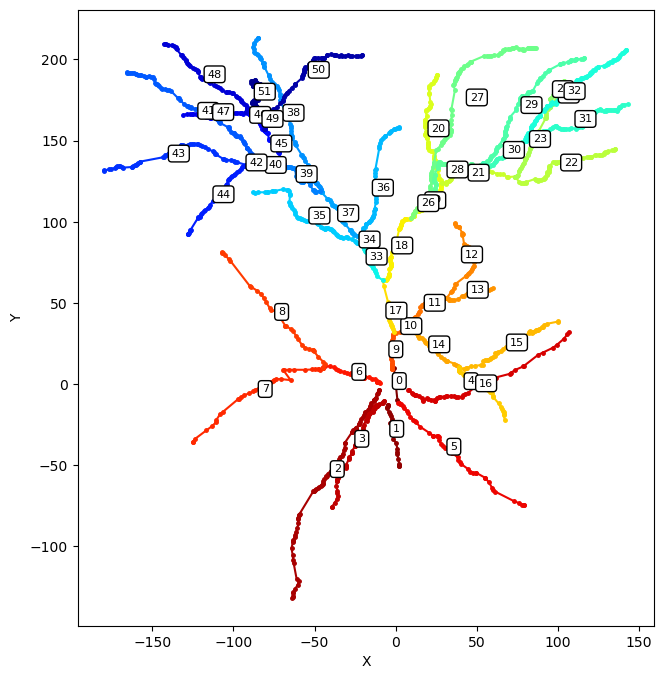

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [18]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'axon': <Domain(axon, 1 sections)>,
 'dend': <Domain(dend, 7 sections)>,
 'apic': <Domain(apic, 43 sections)>}

In [19]:
# model.create_and_reference_sections_in_simulator()
# model.set_segmentation(d_lambda=0.1)
# model.add_group('all', model.domains)

## Add Mechanisms

In [20]:
model.path_manager.print_directory_tree('mod')

├── CaHVA
│   ├── CaHVA.mod
│   └── x86_64
├── CaHVA.mod
├── CaLVA
│   ├── CaLVA.mod
│   └── x86_64
├── CaLVA.mod
├── KCa
│   ├── KCa.mod
│   └── x86_64
├── KCa.mod
├── Ka
│   ├── Ka.mod
│   └── x86_64
├── Ka.mod
├── Km
│   ├── Km.mod
│   └── x86_64
├── Km.mod
├── Kv
│   ├── Kv.mod
│   └── x86_64
├── Kv.mod
├── Na
│   ├── Na.mod
│   └── x86_64
└── Na.mod


The choice here is:
- load all, add where needed (new, faster!)
- load one, add everywhere (old)

In [21]:
model.add_default_mechanisms(recompile=False)

Adding mechanism vecstim to model...
Using precompiled mechanism "vecstim"
Loaded mechanism "vecstim"
Mechanism vecstim loaded to NEURON.

Adding mechanism AMPA_NMDA to model...
Using precompiled mechanism "AMPA_NMDA"
Loaded mechanism "AMPA_NMDA"
Mechanism AMPA_NMDA loaded to NEURON.

Adding mechanism Leak to model...
Using precompiled mechanism "Leak"
Loaded mechanism "Leak"
Mechanism Leak loaded to NEURON.

Adding mechanism AMPA to model...
Using precompiled mechanism "AMPA"
Loaded mechanism "AMPA"
Mechanism AMPA loaded to NEURON.

Adding mechanism GABAa to model...
Using precompiled mechanism "GABAa"
Loaded mechanism "GABAa"
Mechanism GABAa loaded to NEURON.

Adding mechanism NMDA to model...
Using precompiled mechanism "NMDA"
Loaded mechanism "NMDA"
Mechanism NMDA loaded to NEURON.



In [22]:
model.mechanisms

{'Leak': <Mechnaism(Leak)>}

In [23]:
model.params

{'cm': {'all': constant({'value': 1})},
 'Ra': {'all': constant({'value': 35.4})}}

In [24]:
model.params_to_mechs

{'cm': 'Independent', 'Ra': 'Independent'}

In [25]:
model.mechs_to_params

{'Independent': ['cm', 'Ra']}

## Add groups

In [26]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'axon': <Domain(axon, 1 sections)>,
 'dend': <Domain(dend, 7 sections)>,
 'apic': <Domain(apic, 43 sections)>}

In [27]:
model.groups

{'all': SegmentGroup("all", domains=['soma', 'axon', 'dend', 'apic']),
 'soma': SegmentGroup("soma", domains=['soma']),
 'axon': SegmentGroup("axon", domains=['axon']),
 'dend': SegmentGroup("dend", domains=['dend']),
 'apic': SegmentGroup("apic", domains=['apic'])}

In [28]:
model.params

{'cm': {'all': constant({'value': 1})},
 'Ra': {'all': constant({'value': 35.4})}}

## Test domains

In [29]:
model.insert_mechanism('Leak', 'dend')

In [30]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'axon': <Domain(axon, 1 sections)>,
 'dend': <Domain(dend, 7 sections)>,
 'apic': <Domain(apic, 43 sections)>}

Create a new domain by subtracting from an existing one

In [31]:
sections = model.get_sections(lambda sec: sec.domain == 'apic' and sec.diam > 1)
model.define_domain('test1', sections)

Creating domain test1...


In [32]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'axon': <Domain(axon, 1 sections)>,
 'dend': <Domain(dend, 7 sections)>,
 'apic': <Domain(apic, 35 sections)>,
 'test1': <Domain(test1, 8 sections)>}

Create new domain by consuming an existing one

In [33]:
sections = model.get_sections(lambda sec: sec.domain == 'axon')
model.define_domain('test2', sections)

Creating domain test2...


In [34]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'dend': <Domain(dend, 7 sections)>,
 'apic': <Domain(apic, 35 sections)>,
 'test1': <Domain(test1, 8 sections)>,
 'test2': <Domain(test2, 1 sections)>}

In [35]:
model.groups

{'all': SegmentGroup("all", domains=['soma', 'dend', 'apic', 'test1', 'test2']),
 'soma': SegmentGroup("soma", domains=['soma']),
 'dend': SegmentGroup("dend", domains=['dend']),
 'apic': SegmentGroup("apic", domains=['apic']),
 'test1': SegmentGroup("test1", domains=['test1']),
 'test2': SegmentGroup("test2", domains=['test2'])}

Extend an existing domain by consuming another domain

In [36]:
sections = model.get_sections(lambda sec: sec.domain == 'dend' and sec.diam > 0.8)
print(f'Number of sections: {len(sections)}')
model.define_domain('test2', sections)

Number of sections: 3
Extending domain test2...


In [37]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'dend': <Domain(dend, 4 sections)>,
 'apic': <Domain(apic, 35 sections)>,
 'test1': <Domain(test1, 8 sections)>,
 'test2': <Domain(test2, 4 sections)>}

In [38]:
model.domains['dend'].mechanisms

{'Independent': None, 'Leak': <Mechnaism(Leak)>}

In [39]:
model.domains['dend'].sections[0]._ref.has_membrane('Leak')

True

In [40]:
model.domains['test2'].mechanisms

{'Independent': None}

In [41]:
model.domains['test2'].sections[0]._ref.has_membrane('Leak')

False

In [42]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'dend': <Domain(dend, 4 sections)>,
 'apic': <Domain(apic, 35 sections)>,
 'test1': <Domain(test1, 8 sections)>,
 'test2': <Domain(test2, 4 sections)>}

In [43]:
sections = model.get_sections(lambda sec: sec.domain == 'test1')
print(f'Sections: {sections}')
model.define_domain('dend', sections)

Sections: [••9, ••17, ••18, ••19, ••33, ••34, ••37, ••39]
Extending domain dend...


In [44]:
sections[0]._ref.has_membrane('Leak')

True

Attemp to define an existing domain

In [45]:
sections = model.get_sections(lambda sec: sec.domain == 'soma')
model.define_domain('soma', sections)

Extending domain soma...


In [46]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'dend': <Domain(dend, 12 sections)>,
 'apic': <Domain(apic, 35 sections)>,
 'test2': <Domain(test2, 4 sections)>}

## Segmentation

### Set independent parameters

In [45]:
model.set_param(param_name='cm', 
                group_name='all',
                distr_type = 'constant', value=1)
model.set_param(param_name='cm', 
                group_name='soma',
                distr_type = 'constant', value=2)

In [46]:
model.set_param(param_name='Ra', 
                group_name='all',
                distr_type = 'constant', value=100)

In [47]:
model.params

{'cm': {'all': constant({'value': 1}), 'soma': constant({'value': 2})},
 'Ra': {'all': constant({'value': 100})}}

### Create seg tree

In [48]:
d_lambda = 0.1
model.set_segmentation(d_lambda=0.1)

Connecting tree.


In [49]:
model.seg_tree

Tree [•0, •1, •2, •3, •4, •5, •6, •7, •8, •9, •10, •11, •12, •13, •14, •15, •16, •17, •18, •19, •20, •21, •22, •23, •24, •25, •26, •27, •28, •29, •30, •31, •32, •33, •34, •35, •36, •37, •38, •39, •40, •41, •42, •43, •44, •45, •46, •47, •48, •49, •50, •51, •52, •53, •54, •55, •56, •57, •58, •59, •60, •61, •62, •63, •64, •65, •66, •67, •68, •69, •70, •71, •72, •73, •74, •75, •76, •77, •78, •79, •80, •81, •82, •83, •84, •85, •86, •87, •88, •89, •90, •91, •92, •93, •94, •95, •96, •97, •98, •99, •100, •101, •102, •103, •104, •105, •106, •107, •108, •109, •110, •111, •112, •113, •114, •115, •116, •117, •118, •119, •120, •121, •122, •123, •124, •125, •126, •127, •128, •129, •130, •131, •132, •133, •134, •135, •136, •137, •138, •139, •140, •141, •142, •143, •144, •145, •146, •147, •148, •149, •150, •151, •152, •153, •154, •155, •156, •157, •158, •159, •160, •161, •162, •163, •164, •165, •166, •167, •168, •169, •170, •171, •172, •173, •174, •175, •176, •177, •178, •179, •180, •181, •182, •183, 

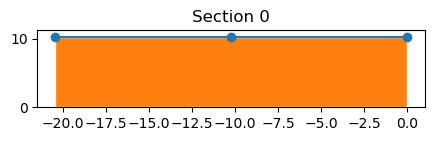

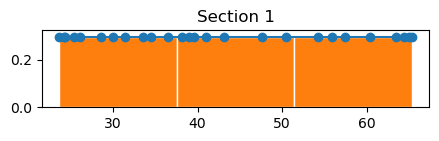

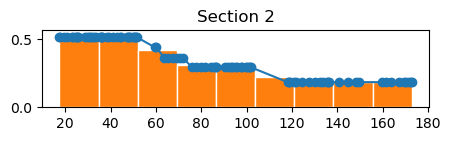

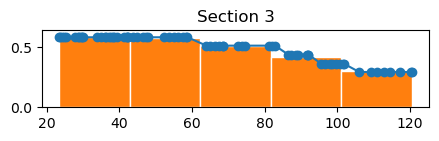

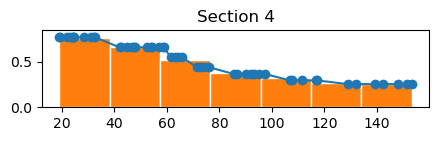

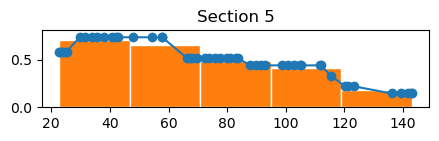

In [50]:
for sec in model.sec_tree.sections:
        fig, ax = plt.subplots(figsize=(5, 1))
        sec.plot_radii(ax)
        ax.set_title(f'Section {sec.idx}')
        if sec.idx >= 5:
            break

In [51]:
len(model.seg_tree)

190

## Distribute mech parameters

In [46]:
all_domains = ['soma', 'dend', 'axon', 'apic']
for domain in all_domains:
    model.insert_mechanism('Leak', domain)
    model.insert_mechanism('Na', domain)
    model.insert_mechanism('Kv', domain)

In [47]:
model.domains_to_mechanisms

{'soma': ['Independent', 'Leak', 'Na', 'Kv'],
 'axon': ['Independent', 'Na', 'Kv'],
 'dend': ['Independent', 'Na', 'Kv'],
 'apic': ['Independent', 'Na', 'Kv']}

In [48]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [50]:
pprint(model.params, sort_dicts=False, width=1)

{'cm': {'all': constant({'value': 1}),
        'soma': constant({'value': 2})},
 'Ra': {'all': constant({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 0.0})},
 'e_Leak': {'all': constant({'value': -70})},
 'gbar_Na': {'all': constant({'value': 0.0})},
 'Rma_Na': {'all': constant({'value': 0.182})},
 'Rmb_Na': {'all': constant({'value': 0.14})},
 'v12m_Na': {'all': constant({'value': -30})},
 'qm_Na': {'all': constant({'value': 9.8})},
 'Rhb_Na': {'all': constant({'value': 0.0091})},
 'Rha_Na': {'all': constant({'value': 0.024})},
 'v12ha_Na': {'all': constant({'value': -45})},
 'v12hb_Na': {'all': constant({'value': -70})},
 'qh_Na': {'all': constant({'value': 5})},
 'v12hinf_Na': {'all': constant({'value': -60})},
 'qhinf_Na': {'all': constant({'value': 6.2})},
 'ena': {'all': constant({'value': 50})},
 'gbar_Kv': {'all': constant({'value': 0.0})},
 'v12_Kv': {'all': constant({'value': 25})},
 'q_Kv': {'all': constant({'value': 9})},
 'ek': {'all': constant({'value': -77})

In [51]:
model.params_to_dataframe()

,Mechanism,Parameter,Group,Distribution
0,Independent,cm,all,constant({'value': 1})
1,Independent,cm,soma,constant({'value': 2})
2,Independent,Ra,all,constant({'value': 100})
3,Independent,ena,all,constant({'value': 50})
4,Independent,ek,all,constant({'value': -77})
5,Leak,gbar_Leak,all,constant({'value': 0.0})
6,Leak,e_Leak,all,constant({'value': -70})
7,Na,gbar_Na,all,constant({'value': 0.0})
8,Na,Rma_Na,all,constant({'value': 0.182})
9,Na,Rmb_Na,all,constant({'value': 0.14})


In [52]:
model.set_param(param_name='gbar_Leak',
                group_name='all',
                distr_type = 'constant', value=0.0001)

In [57]:
for seg in model.seg_tree:
    print(f"Segment {seg.idx} gbar_Leak:{seg.get_param_value('gbar_Leak')}")
    if seg.idx >= 20:
        break

Segment 0 gbar_Leak:0.0001
Segment 1 gbar_Leak:nan
Segment 2 gbar_Leak:nan
Segment 3 gbar_Leak:nan
Segment 4 gbar_Leak:nan
Segment 5 gbar_Leak:nan
Segment 6 gbar_Leak:nan
Segment 7 gbar_Leak:nan
Segment 8 gbar_Leak:nan
Segment 9 gbar_Leak:nan
Segment 10 gbar_Leak:nan
Segment 11 gbar_Leak:nan
Segment 12 gbar_Leak:nan
Segment 13 gbar_Leak:nan
Segment 14 gbar_Leak:nan
Segment 15 gbar_Leak:nan
Segment 16 gbar_Leak:nan
Segment 17 gbar_Leak:nan
Segment 18 gbar_Leak:nan
Segment 19 gbar_Leak:nan
Segment 20 gbar_Leak:nan


In [51]:
model.set_param(param_name='gbar_Na',
                group_name='all',
                distr_type = 'constant', value=0.03)
model.set_param(param_name='gbar_Na',
                group_name='soma',
                distr_type = 'constant', value=0.05)

In [52]:
model.set_param(param_name='gbar_Kv',
                group_name='all', 
                distr_type = 'constant', value=0.003)
model.set_param(param_name='gbar_Kv',
                group_name='soma', 
                distr_type = 'constant', value=0.005)

In [53]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [54]:
model.info()

Model: Park_2019
Path to data: /home/roman/Documents/code/DendroTweaks/app/src/data
Simulator: NEURON
Groups: 2
Avaliable mechanisms: 8
Inserted mechanisms: 3
IClamps: 0



In [55]:
model.params_to_dataframe()

,Mechanism,Parameter,Group,Distribution
0,Independent,cm,all,constant({'value': 1})
1,Independent,cm,soma,constant({'value': 2})
2,Independent,Ra,all,constant({'value': 100})
3,Independent,ena,all,constant({'value': 50})
4,Independent,ek,all,constant({'value': -77})
5,Leak,gbar_Leak,all,constant({'value': 0.0001})
6,Leak,e_Leak,all,constant({'value': -70})
7,Na,gbar_Na,all,constant({'value': 0.03})
8,Na,gbar_Na,soma,constant({'value': 0.05})
9,Na,Rma_Na,all,constant({'value': 0.182})


In [56]:
# model.add_group('axon', lambda sec: sec.domain == 'axon')

## Problem with diams

In [57]:
# Section diam in NEURON
sec._ref.diam

0.9730643074640786

In [58]:
# diam of each segment in NEURON
seg_diams = np.array([seg.diam for seg in sec._ref])
print(f'{seg_diams.size} segments with diam {seg_diams.mean()}')

5 segments with diam 0.9746563460933271


In [59]:
# diam of each pt3d in neuron
pts3d_diams = np.array([sec._ref.diam3d(i) for i in range(sec._ref.n3d())])
print(f'{pts3d_diams.size} pt3d with diam {pts3d_diams.mean()}')

49 pt3d with diam 0.9991836675575801


In [60]:
# diam of each pt3d in custom section
swc_diams = np.array([2*pt.r for pt in sec.pts3d])
print(f'{swc_diams.size} pt3d with diam {swc_diams.mean()}')

49 pt3d with diam 0.9991836734693877


In [61]:
for i, (swc_diam, neuron_diam) in enumerate(zip(swc_diams, pts3d_diams)):
    print(f'{swc_diam} {neuron_diam}')
    if i > 10 : break

1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295


In [62]:
# from core.utils import calculate_lambda_f
# from neuron import h
# h.load_file('stdrun.hoc')
# f = 100
# for sec in model.sec_tree.sections:
#     neuron_sec = sec._ref
#     # diam = neuron_sec.diam
#     diam = np.array([seg.diam for seg in sec._ref]).mean()
#     lambda_f = calculate_lambda_f(diam, neuron_sec.Ra, neuron_sec.cm)
#     lambda_f_neuron = h.lambda_f(f, sec=neuron_sec)
#     nseg = int((neuron_sec.L / (0.1 * lambda_f) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f:.5f} um')
#     nseg_neuron = int((neuron_sec.L / (0.1 * lambda_f_neuron) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f_neuron:.5f} um')
#     # print(f'Neuron lambda_f = {lambda_f_neuron:.5f} um, calculated lambda_f = {lambda_f:.5f} um')
#     print(f'Neuron nseg = {nseg_neuron}, calculated nseg = {nseg}')

# Problem with nseg

Text(0.5, 1.0, 'Correspondence between nseg and length')

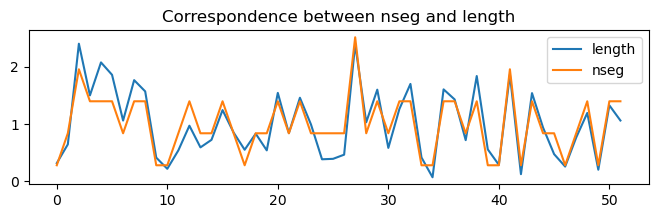

In [63]:
fig, ax = plt.subplots(figsize=(8, 2))
sec_ids = np.array([sec.idx for sec in model.sec_tree.sections])
sec_nseg = np.array([sec._ref.nseg for sec in model.sec_tree.sections])
sec_diams = np.array([np.array([seg.diam for seg in sec._ref]).mean() for sec in model.sec_tree.sections])
# sec_cm = np.array([sec._ref.cm for sec in model.sec_tree.sections])
# sec_Ra = np.array([sec._ref.Ra for sec in model.sec_tree.sections])
sec_lenghts = np.array([sec._ref.L for sec in model.sec_tree.sections])
# draw a vertical line between nseg and length datapoints for each section

sec_nseg = sec_nseg / sec_nseg.mean()
sec_lenghts = sec_lenghts / sec_lenghts.mean()

ys = sec_nseg - sec_lenghts

# ax.vlines(sec_ids, sec_nseg, sec_lenghts, color='k', label='nseg')
ax.plot(sec_ids, sec_lenghts, '-', label='length')
ax.plot(sec_ids, sec_nseg, '-', label='nseg')
# ax.stem(sec_ids, ys, use_line_collection=True)
ax.legend()
ax.set_title('Correspondence between nseg and length')

In [64]:
for sec in model.sec_tree.sections:
    print(f'Section {sec.idx} has {sec._ref.nseg} segments')

Section 0 has 1 segments
Section 1 has 3 segments
Section 2 has 7 segments
Section 3 has 5 segments
Section 4 has 5 segments
Section 5 has 5 segments
Section 6 has 3 segments
Section 7 has 5 segments
Section 8 has 5 segments
Section 9 has 1 segments
Section 10 has 1 segments
Section 11 has 3 segments
Section 12 has 5 segments
Section 13 has 3 segments
Section 14 has 3 segments
Section 15 has 5 segments
Section 16 has 3 segments
Section 17 has 1 segments
Section 18 has 3 segments
Section 19 has 3 segments
Section 20 has 5 segments
Section 21 has 3 segments
Section 22 has 5 segments
Section 23 has 3 segments
Section 24 has 3 segments
Section 25 has 3 segments
Section 26 has 3 segments
Section 27 has 9 segments
Section 28 has 3 segments
Section 29 has 5 segments
Section 30 has 3 segments
Section 31 has 5 segments
Section 32 has 5 segments
Section 33 has 1 segments
Section 34 has 1 segments
Section 35 has 5 segments
Section 36 has 5 segments
Section 37 has 3 segments
Section 38 has 5 segme

# Mechanisms kinetics

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


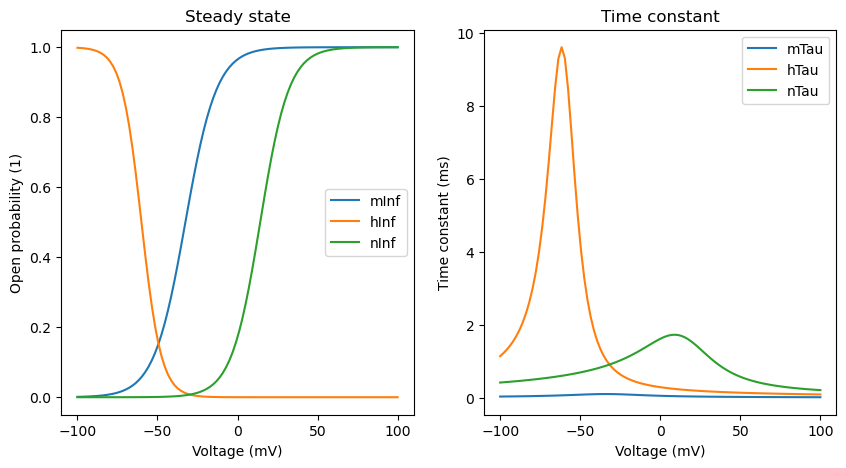

In [65]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax)
model.mechanisms['Kv'].plot_kinetics(ax)

# Simulate

In [66]:
model.set_param('e_Leak', value=-79)
model.set_param('ena', value=60)
model.set_param('ek', value=-80)
model.set_param('temperature', value=37)
model.set_param('v_init', value=-79)

In [67]:
soma = model.sec_tree.soma

In [68]:
soma._ref.psection()

{'point_processes': {},
 'density_mechs': {'Leak': {'gbar': [0.0001], 'e': [-79.0], 'i': [0.0]},
  'Na': {'gbar': [0.05],
   'Rma': [0.182],
   'Rmb': [0.14],
   'v12m': [-30.0],
   'qm': [9.8],
   'Rhb': [0.0091],
   'Rha': [0.024],
   'v12ha': [-45.0],
   'v12hb': [-70.0],
   'qh': [5.0],
   'v12hinf': [-60.0],
   'qhinf': [6.2],
   'i': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Kv': {'gbar': [0.005], 'v12': [25.0], 'q': [9.0], 'i': [0.0], 'n': [0.0]}},
 'ions': {'na': {'ena': [60.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-80.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 20.43792569120254,
  'diam': [20.437925338745117],
  'pts3d': [(1.0855352878570557,
    -10.078556060791016,
    -1.292873740196228,
    20.437925338745117),
   (0.0, 0.0, 0.0, 20.437925338745117),
   (-1.0855352878570557,
    10.078556060791016,
    1.292873740196228,
    20.437925338745117)],
  'parent': None,
  

In [69]:
model.add_recording(soma, loc=0.5)

In [70]:
model.simulator.recordings

{•0: Vector[0]}

In [71]:
model.remove_all_iclamps()
model.add_iclamp(soma, loc=0.5, amp=0.15, delay=100, dur=100)

IClamp added to sec ••0 at loc 0.5.


In [72]:
model.iclamps

{•0: <IClamp(sec[0](0.50))>}

In [73]:
t, v, _ = model.simulator.run(duration=300)

(-100.0, 60.0)

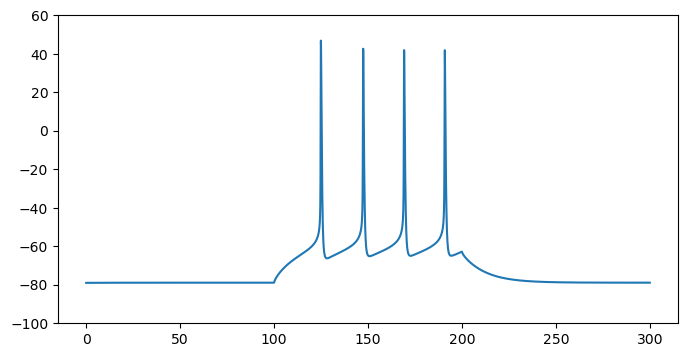

In [74]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)

# Synapses

In [75]:
model.path_manager.print_directory_tree('default_mod')

├── AMPA
│   ├── AMPA.mod
│   └── x86_64
├── AMPA.mod
├── AMPA_NMDA
│   ├── AMPA_NMDA.mod
│   └── x86_64
├── AMPA_NMDA.mod
├── GABAa
│   ├── GABAa.mod
│   └── x86_64
├── GABAa.mod
├── Leak
│   ├── Leak.mod
│   └── x86_64
├── Leak.mod
├── NMDA
│   ├── NMDA.mod
│   └── x86_64
├── NMDA.mod
├── vecstim
│   ├── vecstim.mod
│   └── x86_64
└── vecstim.mod


In [76]:
model.add_population(
    segments=[seg for sec in model.get_sections(lambda sec: sec.domain == 'dend') for seg in sec.segments], 
    N=10, 
    syn_type='AMPA'
)

In [77]:
pop = model.populations['AMPA']['AMPA_0']

Text(0, 0.5, 'Number of synapses')

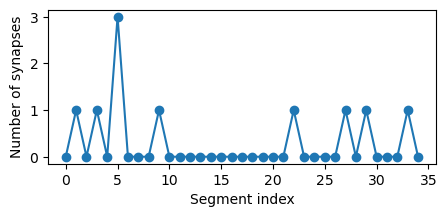

In [78]:
fig, ax = plt.subplots(figsize=(5, 2))
# histogram of synapse N per secton (pop.n_per_sec)
plt.plot([v for k,v in pop.n_per_seg.items()], 'o-');
plt.xlabel('Segment index')
plt.ylabel('Number of synapses')

In [79]:
pop.update_input_params({'rate':100, 'weight':1, 'noise':1})

In [80]:
pprint(model.to_dict(), sort_dicts=False, width=1)

{'metadata': {'name': 'Park_2019'},
 'simulation': {'d_lambda': 0.1,
                'temperature': 37,
                'v_init': -79,
                'dt': 0.025},
 'domains': {0: 'soma',
             1: 'axon',
             2: 'dend',
             3: 'dend',
             4: 'dend',
             5: 'dend',
             6: 'dend',
             7: 'dend',
             8: 'dend',
             9: 'apic',
             10: 'apic',
             11: 'apic',
             12: 'apic',
             13: 'apic',
             14: 'apic',
             15: 'apic',
             16: 'apic',
             17: 'apic',
             18: 'apic',
             19: 'apic',
             20: 'apic',
             21: 'apic',
             22: 'apic',
             23: 'apic',
             24: 'apic',
             25: 'apic',
             26: 'apic',
             27: 'apic',
             28: 'apic',
             29: 'apic',
             30: 'apic',
             31: 'apic',
             32: 'apic',
             33: 'ap

In [81]:
model.export_data()

{'type': ['recording'], 'idx': [0], 'sec_idx': [0], 'loc': [0.5], 'n_per_seg': [1]}
